In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:/Users/agoel/Desktop/ExcelR Study Material/50_Startups.csv")

In [3]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:

#data transformation
data=data.rename(columns={'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'})
data.drop(columns=['State'], axis=1, inplace=True)

In [5]:
data.info() #check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


Correlation analysis

In [6]:
data.corr()

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Scatterplot between variables along with histograms

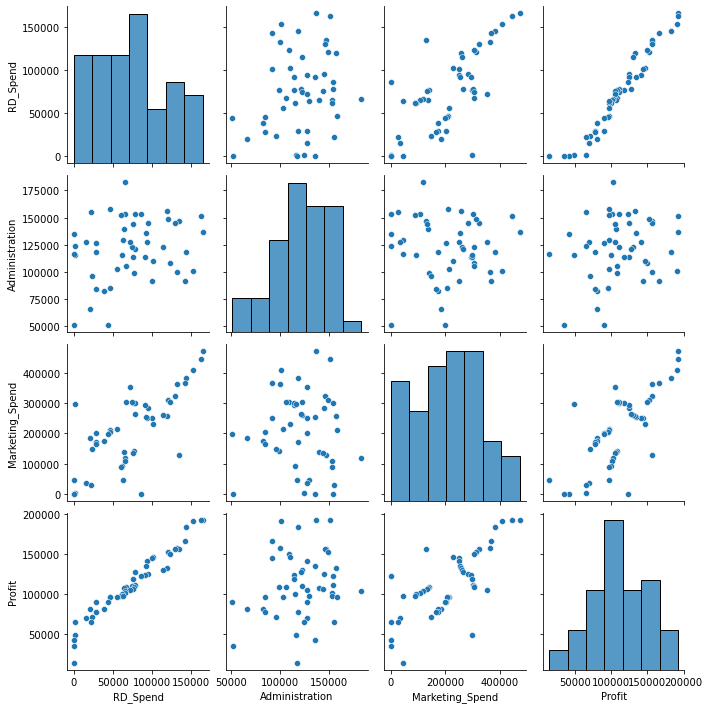

In [7]:
sns.pairplot(data=data)

Build model and Train model

In [8]:
model=smf.ols("Profit~RD_Spend+Administration+Marketing_Spend", data=data).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           4.53e-30
Time:                        10:05:13   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
print(model.tvalues, model.pvalues)

Intercept           7.626218
RD_Spend           17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 Intercept          1.057379e-09
RD_Spend           2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [11]:
model.params #coefficients

Intercept          50122.192990
RD_Spend               0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [12]:

(model.rsquared,model.rsquared_adj) #rsquared

(0.9507459940683246, 0.9475337762901719)

Simple Linear Regression Models

In [13]:
m1_rd=smf.ols("Profit~RD_Spend",data=data).fit()
m1_rd.pvalues

Intercept    2.782697e-24
RD_Spend     3.500322e-32
dtype: float64

In [14]:
m2_admin=smf.ols("Profit~Administration",data=data).fit()
m2_admin.pvalues

Intercept         0.003824
Administration    0.162217
dtype: float64

In [15]:
m3_Marketing=smf.ols("Profit~Marketing_Spend",data=data).fit()
m3_Marketing.pvalues

Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64

In [16]:
model1=smf.ols("Profit~RD_Spend+Marketing_Spend",data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           2.16e-31
Time:                        10:05:13   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD_Spend            0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


Calculating VIF

In [17]:
r2_rd=smf.ols("RD_Spend~Administration+Marketing_Spend", data=data).fit().rsquared
vif_rd = 1/(1-r2_rd)
r3_Admin=smf.ols("Administration~RD_Spend+Marketing_Spend",data=data).fit().rsquared
vif_Admin= 1/(1-r3_Admin)
r4_Market=smf.ols("Marketing_Spend~Administration+RD_Spend",data=data).fit().rsquared
vif_Market=1/(1-r4_Market)
d1= ({"variable":["RD","admin","market"], "VIF":[vif_rd,vif_Admin,vif_Market]})
vif= pd.DataFrame(d1)
vif

,variable,VIF
0,RD,2.468903
1,admin,1.175091
2,market,2.326773


In [18]:
model.resid.head()

0    -259.422890
1    2635.291768
2    8903.110904
3    9205.289974
4   -5951.574183
dtype: float64

Residual Analysis

Test for Normality of Residuals (Q-Q Plot)

<function matplotlib.pyplot.show(close=None, block=None)>

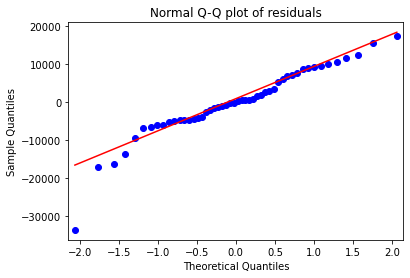

In [19]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

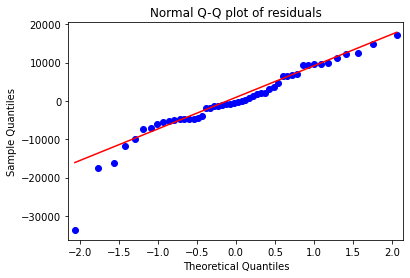

In [20]:
qqplot1=sm.qqplot(model1.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show

Residual Plot for Homoscedasticity

In [21]:
def get_standardized_values(val):
    return((val-val.mean())/val.std())

Text(0, 0.5, 'residuals')

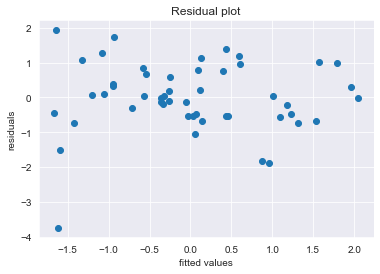

In [22]:
sns.set_style(style='darkgrid')
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title("Residual plot")
plt.xlabel("fitted values")
plt.ylabel("residuals")

Residual Vs Regressors

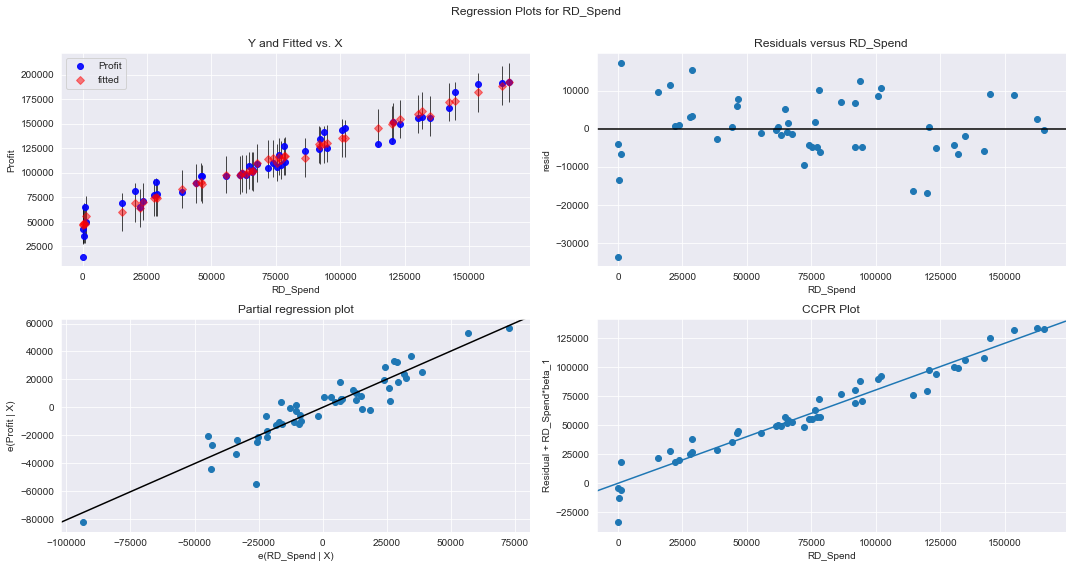

In [23]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, 'RD_Spend', fig=fig)
plt.show()

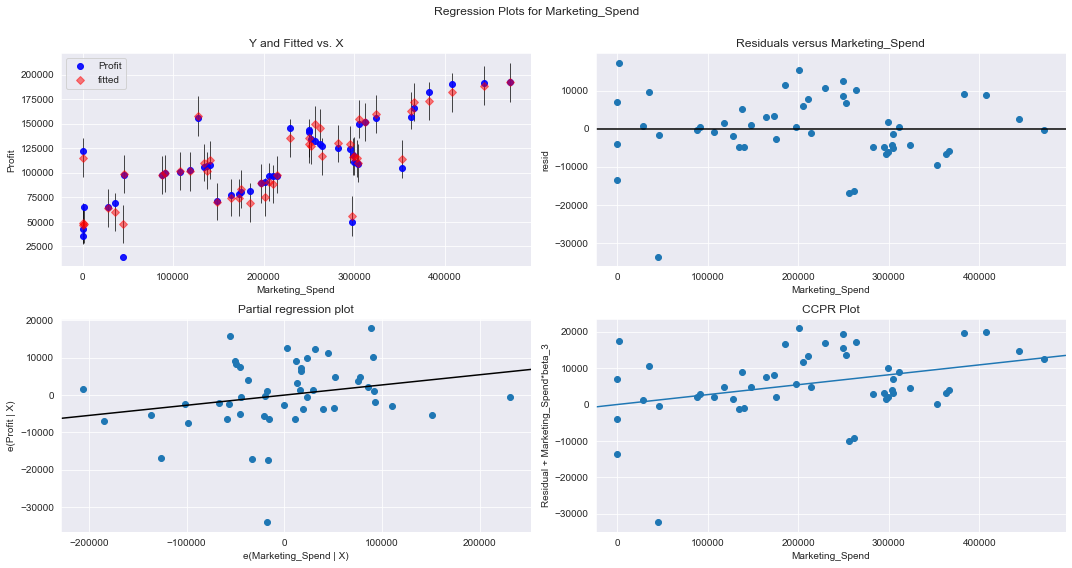

In [24]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Marketing_Spend', fig=fig)
plt.show()

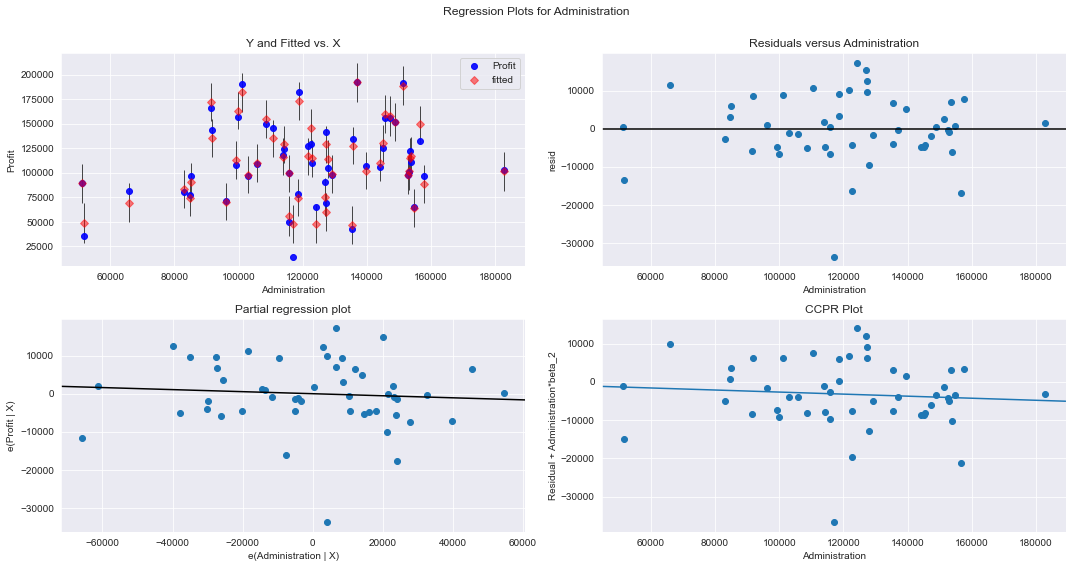

In [26]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Administration", fig=fig)

Model Deletion Diagnostics

Detecting Influencers/Outliers

Cook’s Distance

In [31]:
model_influence=model.get_influence()
model_influence
(c, _)=model_influence.cooks_distance

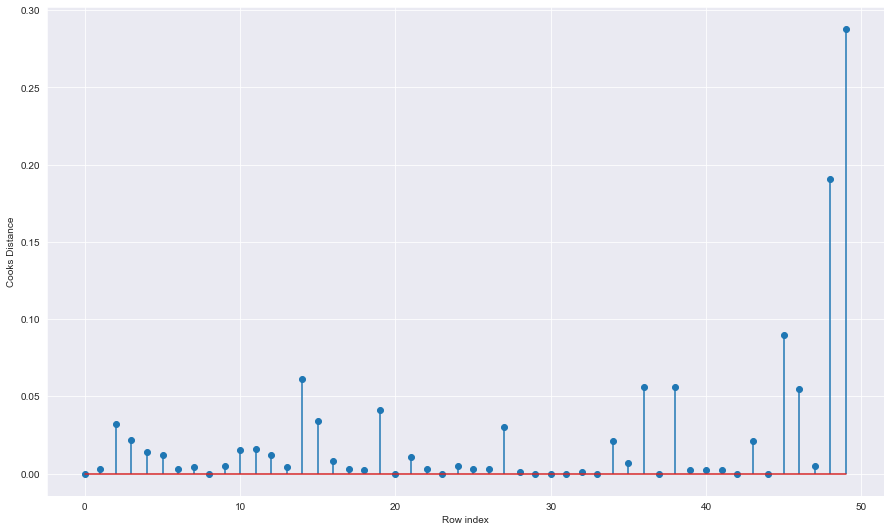

In [33]:
fig=plt.subplots(figsize=(15,9))
plt.stem(np.arange(len(data)),np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show() #No extreme values

In [35]:
(np.argmax(c), np.max(c))

(49, 0.28808229275432634)

In [37]:

k=data.shape[1]
n=data.shape[0]
leverage=3*((k+1)/n)
leverage

0.30000000000000004

High Influence points

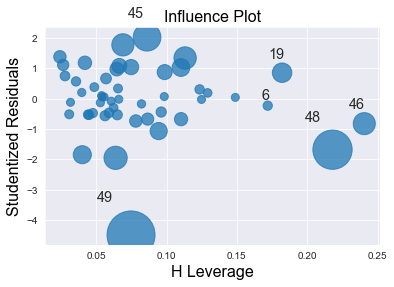

In [39]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

From the above plot, it is evident that data point 46, 48 and 49 are the influencers

In [41]:
data[data.index.isin([46,48,49])]

,RD_Spend,Administration,Marketing_Spend,Profit
46,1315.46,115816.21,297114.46,49490.75
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


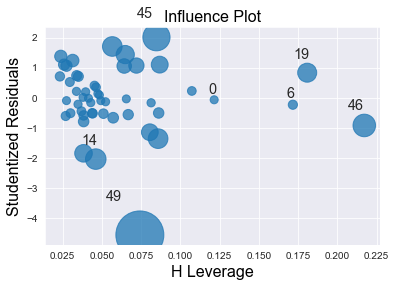

In [43]:

influence_plot(model1)
plt.show()

Improving the model

In [46]:
data1=data.drop(data.index[[46,48,49]],axis=0).reset_index()
data1=data1.drop(columns=['index','Administration'])
data1.head()
data1.shape

(47, 3)

Build model

In [47]:
model2=smf.ols("Profit~RD_Spend+Marketing_Spend", data=data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     529.6
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           1.65e-31
Time:                        10:23:58   Log-Likelihood:                -483.40
No. Observations:                  47   AIC:                             972.8
Df Residuals:                      44   BIC:                             978.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.171e+04   2358.725     21.924      0.000     4.7e+04    5.65e+04
RD_Spend            0.7439      0.037     19.902      0.000       0.669       0.819
Marketing_Spend     0.0323      0.014      2.376      0.022       0.005       0.060
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.292
Skew:                           0.000   Prob(JB):                        0.864
Kurtosis:                       2.614   Cond. No.                     5.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Cook’s Distance

In [48]:
model_inf=model2.get_influence()
(c, _)=model_inf.cooks_distance

<StemContainer object of 3 artists>

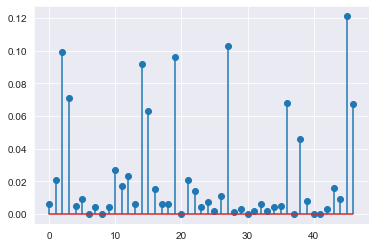

In [49]:
plt.stem(np.arange(len(data1)),np.round(c,3))

In [50]:
(np.argmax(c),np.max(c))

(45, 0.12080904032647956)

In [52]:
data_new = pd.read_csv("C:/Users/agoel/Desktop/ExcelR Study Material/50_Startups.csv")
dat=data_new.drop(data_new.index[[46,48,49]],axis=0).reset_index()
dat=dat.drop(['index','Administration','State'],axis=1)
dat.rename(columns={'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend' }, inplace = True)
dat.head()

,RD_Spend,Marketing_Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


In [53]:
fnl_model=smf.ols("Profit~RD_Spend+Marketing_Spend", data=dat).fit()
fnl_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     529.6
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           1.65e-31
Time:                        11:04:11   Log-Likelihood:                -483.40
No. Observations:                  47   AIC:                             972.8
Df Residuals:                      44   BIC:                             978.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.171e+04   2358.725     21.924      0.000     4.7e+04    5.65e+04
RD_Spend            0.7439      0.037     19.902      0.000       0.669       0.819
Marketing_Spend     0.0323      0.014      2.376      0.022       0.005       0.060
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.292
Skew:                           0.000   Prob(JB):                        0.864
Kurtosis:                       2.614   Cond. No.                     5.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Predicting for new values

In [54]:
predict1=pd.DataFrame({"RD_Spend":[12000,13000,100000],"Marketing_Spend":[10000,34444,250000]})
predict1

,RD_Spend,Marketing_Spend
0,12000,10000
1,13000,34444
2,100000,250000


In [55]:
fnl_model.predict(data.iloc[:5,])

0    189947.201324
1    186999.822978
2    179027.346980
3    171482.332145
4    169247.365053
dtype: float64

In [57]:
fnl_model.predict(predict1)

0     60962.396936
1     62495.751680
2    134173.457814
dtype: float64

In [58]:
predicted_values=fnl_model.predict(dat)
dat['predcited_values']=pd.Series(predicted_values)
dat.head()

,RD_Spend,Marketing_Spend,Profit,predcited_values
0,165349.20,471784.10,192261.83,189947.201324
1,162597.70,443898.53,191792.06,186999.822978
2,153441.51,407934.54,191050.39,179027.346980
3,144372.41,383199.62,182901.99,171482.332145
4,142107.34,366168.42,166187.94,169247.365053


In [59]:
dat.corr()

,RD_Spend,Marketing_Spend,Profit,predcited_values
RD_Spend,1.000000,0.744465,0.977240,0.997332
Marketing_Spend,0.744465,1.000000,0.775282,0.791222
Profit,0.977240,0.775282,1.000000,0.979855
predcited_values,0.997332,0.791222,0.979855,1.000000


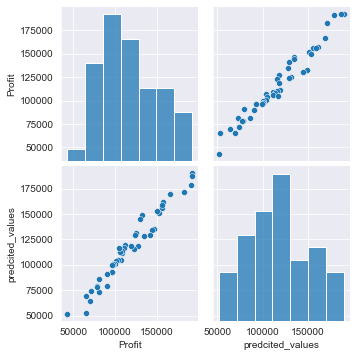

In [60]:
sns.pairplot(dat[['Profit','predcited_values']])